In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('c:/reposit/data/철원이형/house_prices.csv', encoding='cp949')
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


##  방의 개수(RM)가 7개 초과일 확률

In [3]:
rm = df[df['RM']>7]
rm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [4]:
len(rm) / len(df)

0.12648221343873517

### 조건부 확률

In [7]:
ptratio = df[df['PTRATIO']<15]
ptratio.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.9,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.9,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.9,29.29,11.8


In [8]:
p_ptratio = len(ptratio) / len(df)
p_ptratio

0.11462450592885376

In [9]:
ptratio_rm = df[(df['RM']>7) & (df['PTRATIO']<15)]
ptratio_rm.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0


In [10]:
p_ptratio_rm = len(ptratio_rm) / len(df)
p_ptratio_rm

0.04940711462450593

In [11]:
p = p_ptratio_rm / p_ptratio
p

0.43103448275862066

## 평균, 분산, 표준편차

### 평균

In [12]:
np.mean(df['RM'])

6.284634387351779

In [13]:
df['RM'].mean()

6.284634387351779

In [14]:
n = len(df)

sum_x = 0

for x in df['RM']:
    sum_x += x

mean_rm = sum_x / n
mean_rm

6.284634387351787

### 분산

In [15]:
np.var(df['RM'])

0.49269521612976347

In [16]:
df['RM'].var()

0.4936708502211095

In [17]:
np.std(df['RM'])

0.7019225143345692

In [18]:
df['RM'].std()

0.7026171434153237

In [19]:
n = len(df)
ss = 0
for x in df['RM']:
    ss += (x - mean_rm)**2

In [20]:
var_rm = ss / n
std_rm = var_rm**0.5

var_rm, std_rm

(0.49269521612976347, 0.7019225143345692)

In [21]:
var_rm = ss / (n-1)
std_rm = var_rm**0.5

var_rm, std_rm

(0.4936708502211095, 0.7026171434153237)

In [22]:
# 넘파이
np.var(df['RM'], ddof=0), np.var(df['RM'], ddof=1)

(0.49269521612976347, 0.4936708502211095)

In [23]:
# 판다스
df['RM'].var(ddof=0), df['RM'].var()

(0.49269521612976347, 0.4936708502211095)

### 공분산

In [24]:
X = df[['CRIM', 'NOX', 'RM', 'AGE', 'TAX']]
X

,CRIM,NOX,RM,AGE,TAX
0,0.00632,0.538,6.575,65.2,296
1,0.02731,0.469,6.421,78.9,242
2,0.02729,0.469,7.185,61.1,242
3,0.03237,0.458,6.998,45.8,222
4,0.06905,0.458,7.147,54.2,222
...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,273
502,0.04527,0.573,6.120,76.7,273
503,0.06076,0.573,6.976,91.0,273
504,0.10959,0.573,6.794,89.3,273


In [25]:
cov_x = np.cov(X, rowvar=0) # rowvar=0 행이 아니라 열을 기준으로
cov_x

array([[ 7.39865782e+01,  4.19593894e-01, -1.32503785e+00,
         8.54053223e+01,  8.44821538e+02],
       [ 4.19593894e-01,  1.34276357e-02, -2.46034495e-02,
         2.38592720e+00,  1.30462855e+01],
       [-1.32503785e+00, -2.46034495e-02,  4.93670850e-01,
        -4.75192919e+00, -3.45834478e+01],
       [ 8.54053223e+01,  2.38592720e+00, -4.75192919e+00,
         7.92358399e+02,  2.40269012e+03],
       [ 8.44821538e+02,  1.30462855e+01, -3.45834478e+01,
         2.40269012e+03,  2.84047595e+04]])

In [26]:
cov_x = np.cov(X.T)
cov_x

array([[ 7.39865782e+01,  4.19593894e-01, -1.32503785e+00,
         8.54053223e+01,  8.44821538e+02],
       [ 4.19593894e-01,  1.34276357e-02, -2.46034495e-02,
         2.38592720e+00,  1.30462855e+01],
       [-1.32503785e+00, -2.46034495e-02,  4.93670850e-01,
        -4.75192919e+00, -3.45834478e+01],
       [ 8.54053223e+01,  2.38592720e+00, -4.75192919e+00,
         7.92358399e+02,  2.40269012e+03],
       [ 8.44821538e+02,  1.30462855e+01, -3.45834478e+01,
         2.40269012e+03,  2.84047595e+04]])

In [27]:
cov_x = X.cov()
cov_x

,CRIM,NOX,RM,AGE,TAX
CRIM,73.986578,0.419594,-1.325038,85.405322,844.821538
NOX,0.419594,0.013428,-0.024603,2.385927,13.046286
RM,-1.325038,-0.024603,0.493671,-4.751929,-34.583448
AGE,85.405322,2.385927,-4.751929,792.358399,2402.690122
TAX,844.821538,13.046286,-34.583448,2402.690122,28404.759488


### 피어슨 상관계수

In [28]:
corr_x = np.corrcoef(X.T)
corr_x

array([[ 1.        ,  0.42097171, -0.2192467 ,  0.35273425,  0.58276431],
       [ 0.42097171,  1.        , -0.30218819,  0.7314701 ,  0.6680232 ],
       [-0.2192467 , -0.30218819,  1.        , -0.24026493, -0.29204783],
       [ 0.35273425,  0.7314701 , -0.24026493,  1.        ,  0.50645559],
       [ 0.58276431,  0.6680232 , -0.29204783,  0.50645559,  1.        ]])

In [29]:
corr_x = X.corr()
corr_x

,CRIM,NOX,RM,AGE,TAX
CRIM,1.000000,0.420972,-0.219247,0.352734,0.582764
NOX,0.420972,1.000000,-0.302188,0.731470,0.668023
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.292048
AGE,0.352734,0.731470,-0.240265,1.000000,0.506456
TAX,0.582764,0.668023,-0.292048,0.506456,1.000000


In [30]:
import seaborn as sns

<Axes: >

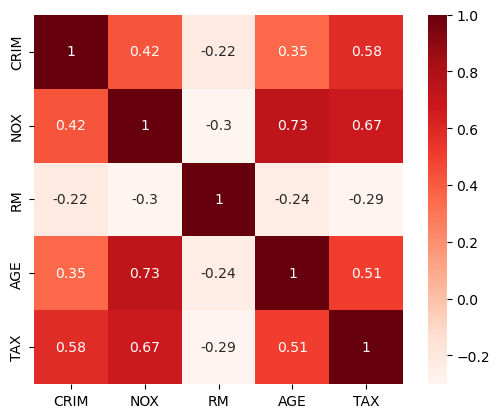

In [32]:
sns.heatmap(corr_x, annot=True, cmap='Reds', square=True)

<Axes: xlabel='NOX', ylabel='AGE'>

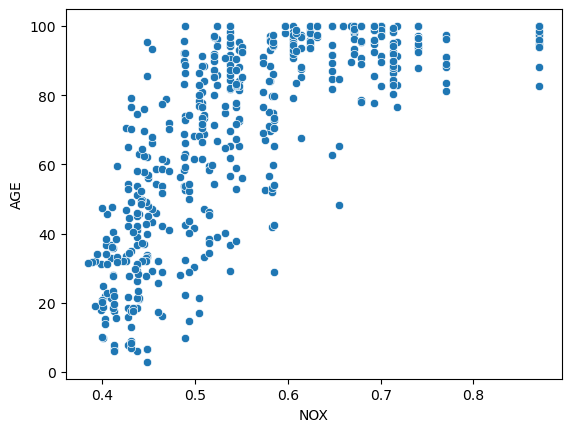

In [33]:
sns.scatterplot(data=df, x='NOX', y='AGE')

<Axes: xlabel='NOX', ylabel='TAX'>

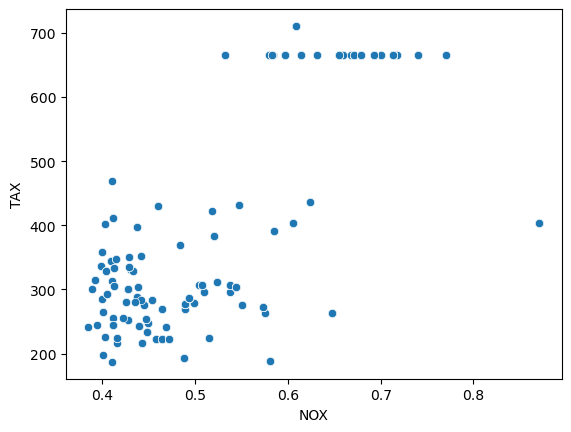

In [34]:
sns.scatterplot(data=df, x='NOX', y='TAX')

### 히스토그램

<Axes: xlabel='RM', ylabel='Count'>

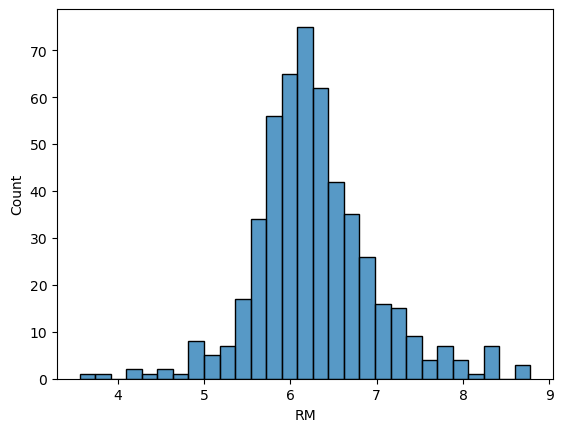

In [37]:
sns.histplot(data=df, x='RM')

<Axes: xlabel='NOX', ylabel='Count'>

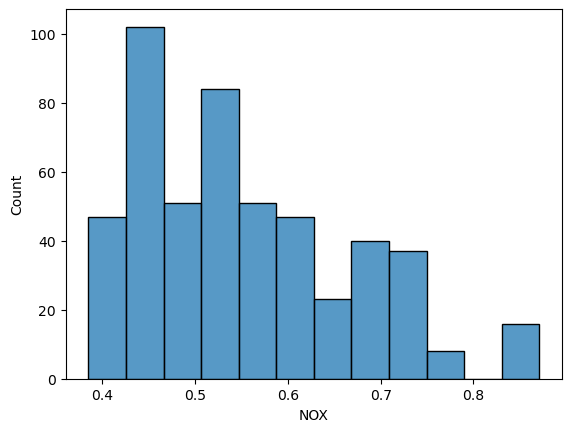

In [42]:
sns.histplot(data=df, x='NOX')

<Axes: xlabel='TAX', ylabel='Count'>

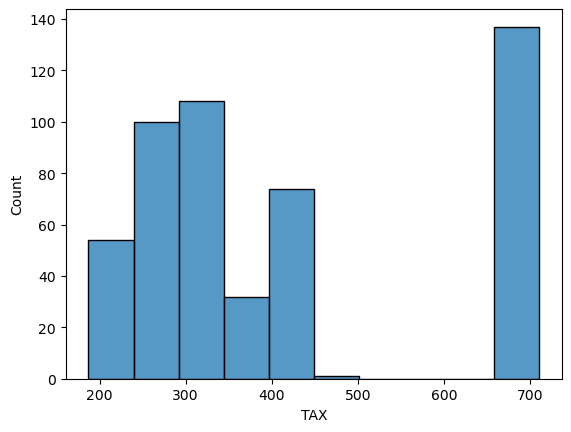

In [39]:
sns.histplot(data=df, x='TAX')

In [43]:
import matplotlib.pyplot as plt

In [44]:
x = np.random.randint(low=1, high=6, size=100)
x

array([2, 2, 1, 4, 3, 2, 2, 4, 3, 3, 3, 4, 2, 1, 4, 4, 4, 5, 5, 4, 4, 1,
       5, 4, 4, 3, 5, 3, 1, 1, 3, 1, 4, 4, 4, 3, 4, 3, 5, 4, 1, 2, 3, 5,
       5, 5, 3, 2, 5, 3, 3, 1, 1, 1, 3, 2, 1, 3, 2, 5, 5, 2, 1, 3, 3, 3,
       2, 5, 2, 5, 5, 4, 4, 2, 3, 1, 5, 1, 1, 4, 3, 3, 2, 3, 3, 3, 5, 1,
       2, 5, 4, 3, 1, 1, 3, 2, 2, 2, 1, 3])

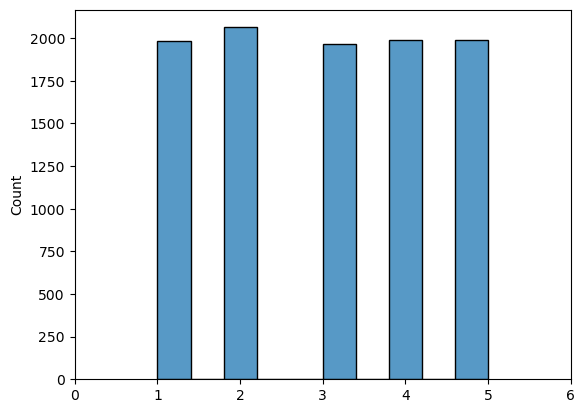

In [49]:
sns.histplot(x, bins=10)
plt.xticks(range(0, 7))
plt.show()

In [61]:
x = np.random.randint(low=1, high=6, size=10000)
x

array([4, 3, 5, ..., 2, 2, 1])

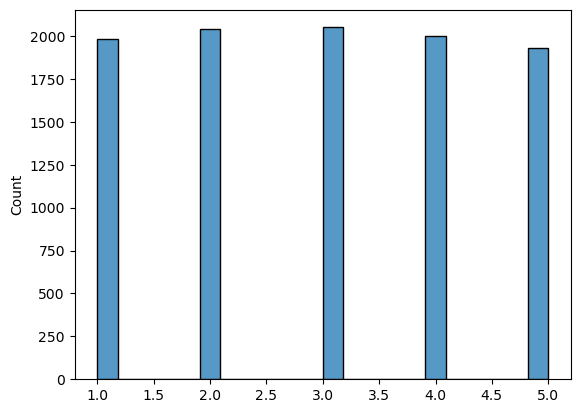

In [62]:
sns.histplot(x)
plt.show()

In [63]:
x

array([4, 3, 5, ..., 2, 2, 1])

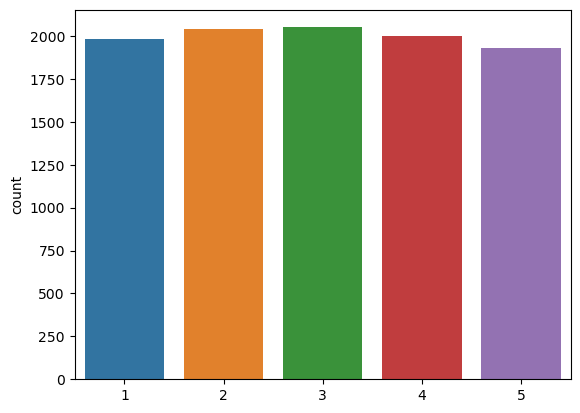

In [64]:
sns.countplot(x=x)
plt.show()

### 베르누이 분포 Bernoulli distribution

In [65]:
x = np.random.binomial(n=1, p=1/3, size=100)
x

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

<Axes: ylabel='count'>

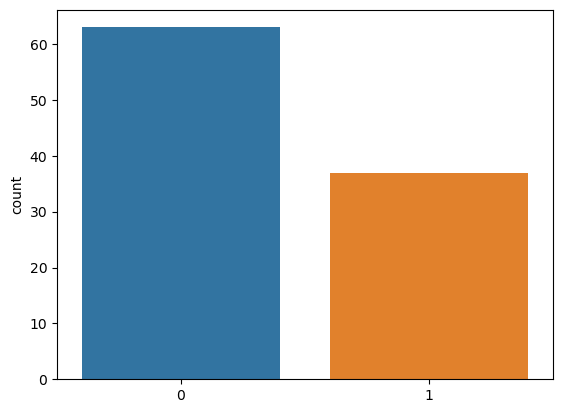

In [66]:
sns.countplot(x=x)

In [67]:
x = np.random.binomial(n=1, p=1/3, size=10000)
x

array([0, 0, 1, ..., 0, 0, 0])

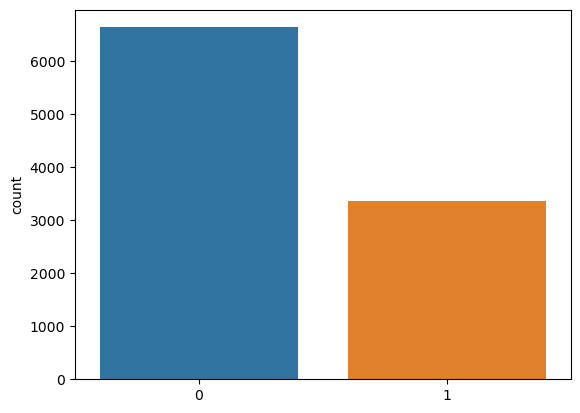

In [69]:
sns.countplot(x=x)
plt.show()

### 이항 분포 binomial distribution

In [70]:
x = np.random.binomial(n=10, p=1/3, size=100)
x # 10번 뽑았을 때 성공 횟수

array([3, 2, 2, 5, 4, 2, 1, 3, 3, 3, 2, 3, 3, 1, 2, 7, 4, 3, 3, 4, 6, 5,
       3, 4, 3, 2, 3, 4, 6, 3, 4, 2, 3, 3, 5, 4, 1, 3, 3, 5, 1, 3, 3, 3,
       3, 2, 6, 4, 4, 3, 4, 2, 2, 4, 6, 5, 4, 4, 3, 6, 0, 4, 3, 2, 3, 3,
       2, 2, 2, 4, 4, 3, 1, 3, 4, 6, 3, 5, 4, 3, 4, 3, 3, 1, 2, 4, 8, 5,
       6, 6, 4, 4, 7, 5, 2, 5, 2, 0, 4, 3])

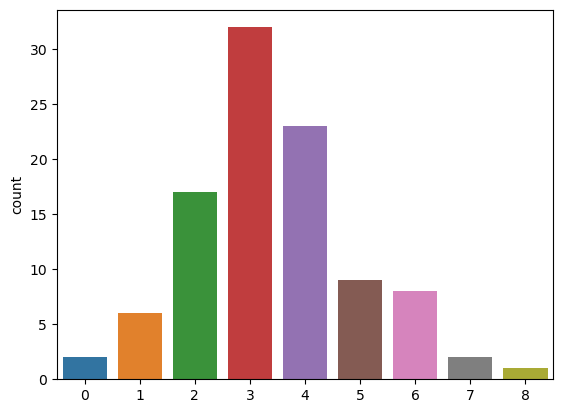

In [71]:
sns.countplot(x=x)
plt.show()

In [72]:
x = np.random.binomial(n=10, p=1/3, size=10000)
x # 10번 뽑았을 때 성공 횟수

array([2, 5, 5, ..., 4, 3, 2])

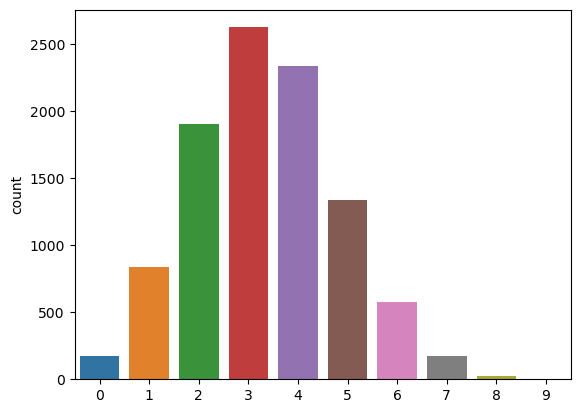

In [73]:
sns.countplot(x=x)
plt.show()

### 포아송 분포 poisson distribution

In [74]:
x = np.random.poisson(lam=2, size=100) # lam 람다
x

array([2, 4, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 2, 4, 0, 2, 3, 2,
       1, 3, 2, 5, 2, 1, 3, 3, 1, 0, 2, 0, 0, 0, 0, 2, 4, 2, 2, 1, 3, 0,
       4, 2, 4, 1, 1, 2, 3, 4, 2, 2, 1, 2, 2, 4, 2, 3, 0, 1, 2, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1, 3, 2, 2, 4, 0, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 4, 1, 1, 2, 2])

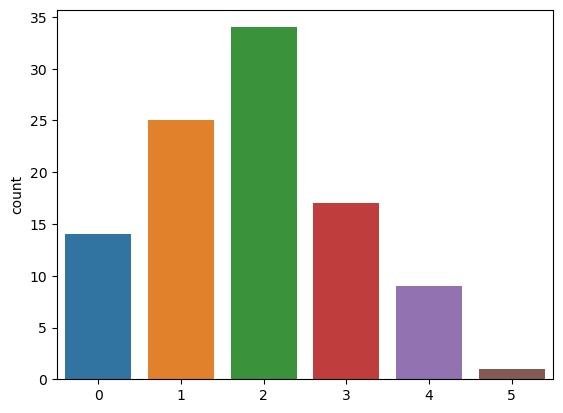

In [75]:
sns.countplot(x=x)
plt.show()

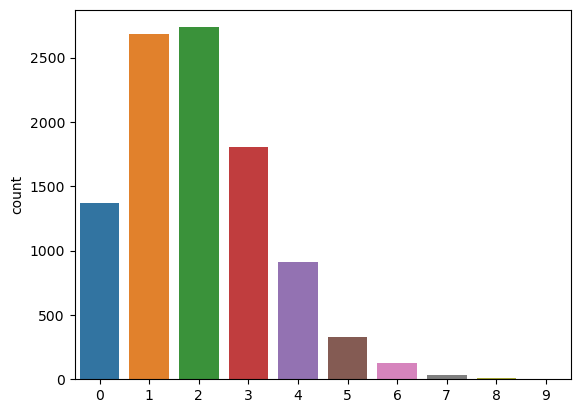

In [76]:
x = np.random.poisson(lam=2, size=10000) # lam 람다
sns.countplot(x=x)
plt.show()

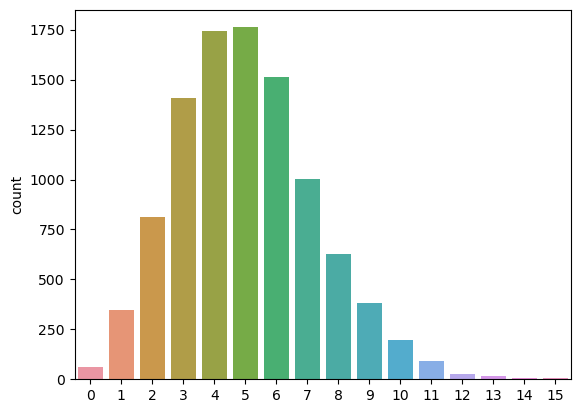

In [77]:
x = np.random.poisson(lam=5, size=10000) # lam 람다
sns.countplot(x=x)
plt.show()

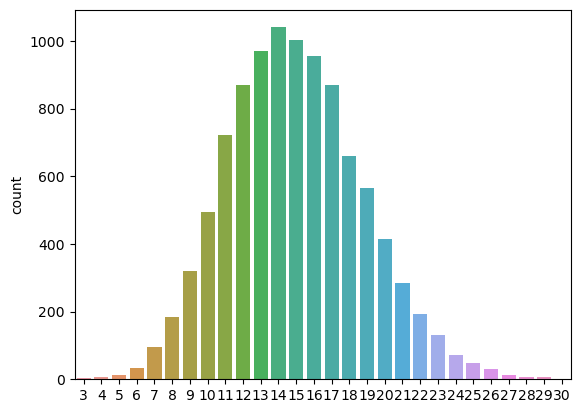

In [78]:
x = np.random.poisson(lam=15, size=10000) # lam 람다
sns.countplot(x=x)
plt.show()

### 기하 분포 geometric distribution

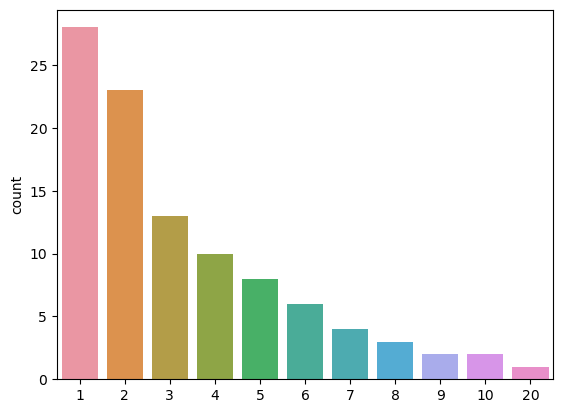

In [79]:
x = np.random.geometric(p=1/3, size=100)
sns.countplot(x=x)
plt.show()

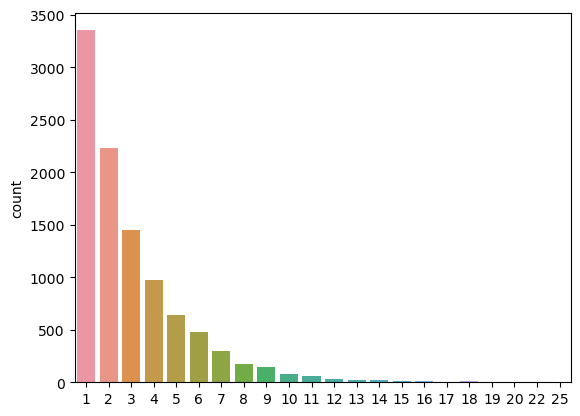

In [80]:
x = np.random.geometric(p=1/3, size=10000)
sns.countplot(x=x)
plt.show()

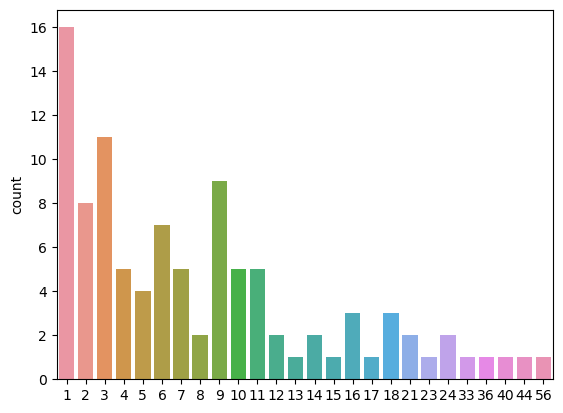

In [81]:
x = np.random.geometric(p=1/10, size=100)
sns.countplot(x=x)
plt.show()

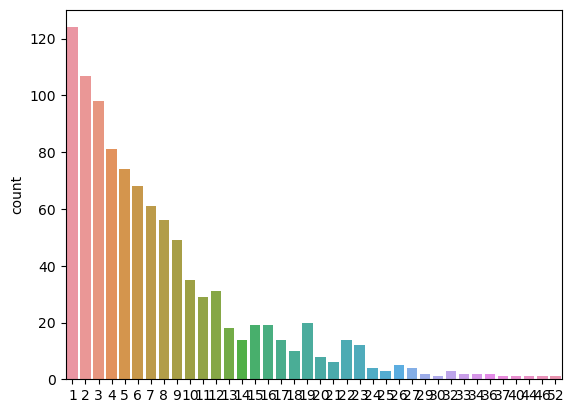

In [84]:
x = np.random.geometric(p=1/8, size=1000)
sns.countplot(x=x)
plt.show()

## 연속형 확률 분포

### 균일 분포 uniform distribution

[2.35618249 3.2273985  3.24200567 5.36105372 2.24565899 4.66956827
 4.49379775 3.42515921 3.3168562  4.28498594]


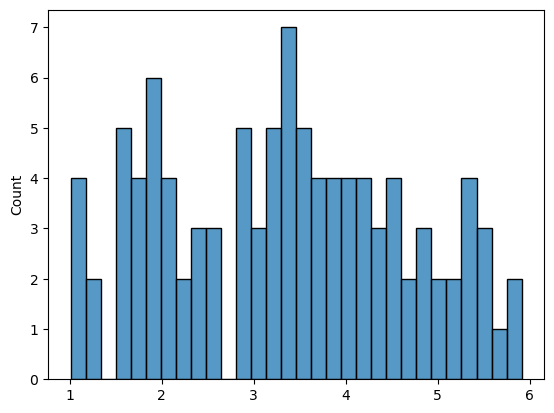

In [89]:
x = np.random.uniform(low=1, high=6, size=100)
print(x[:10])
sns.histplot(x=x, bins=30)
plt.show()

[4.39799803 4.12855332 5.87432519 2.76232107 2.65901457 4.90307658
 1.20694867 3.91718668 5.63848439 3.5195687 ]


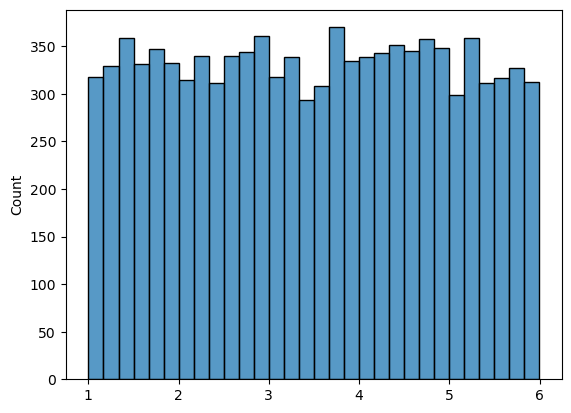

In [90]:
x = np.random.uniform(low=1, high=6, size=10000)
print(x[:10])
sns.histplot(x=x, bins=30)
plt.show()

### 정규 분포 normal distribution

In [92]:
x = np.random.normal(loc=60, scale=6, size=100) # loc 평균, scale 표준편차
x

array([64.08397664, 58.47117276, 60.72238655, 60.6347787 , 58.47272188,
       57.93118316, 55.05112904, 62.86385122, 59.87588163, 68.09715519,
       55.54536401, 58.24243535, 61.89000458, 61.1549032 , 59.80662194,
       68.70864645, 60.51065015, 54.80533919, 52.10615491, 58.80922351,
       68.20570258, 51.51402118, 55.35963352, 63.54453728, 71.0789317 ,
       64.79169323, 59.9228372 , 63.25151459, 52.03946779, 50.91215703,
       54.70699915, 60.96321363, 63.90626594, 67.66795265, 62.67220621,
       60.02846206, 57.65889079, 56.41537408, 60.32186575, 60.8575994 ,
       62.16086598, 49.69281771, 70.39042105, 64.40710148, 54.22138363,
       61.57268499, 56.19584075, 61.70692385, 59.53105017, 55.00331248,
       61.46370413, 53.33999324, 59.39830199, 61.97867058, 49.13484504,
       62.75744297, 59.38281444, 68.10152053, 57.03517667, 55.5248924 ,
       62.13885015, 58.63249863, 65.38204494, 61.57747415, 59.21703572,
       58.78901537, 64.66980861, 63.51411145, 65.84574973, 64.51

<Axes: ylabel='Count'>

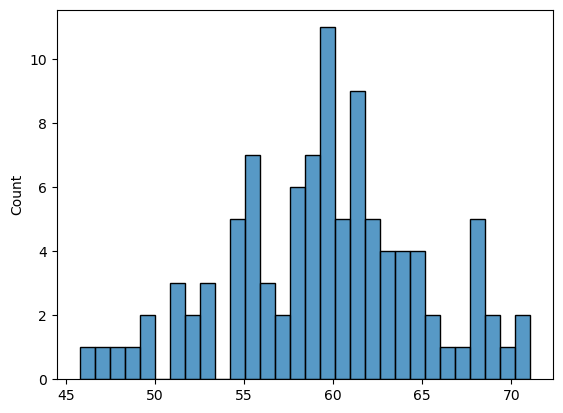

In [95]:
sns.histplot(x=x, bins=30)

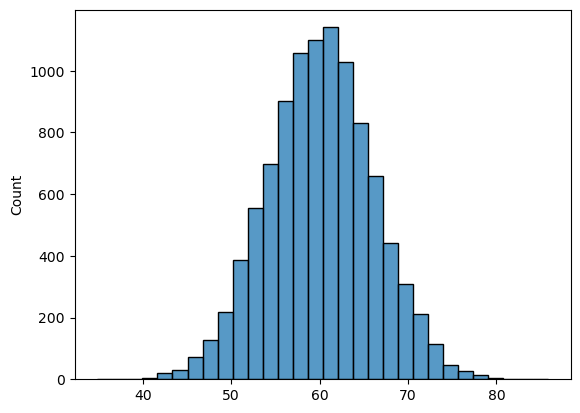

In [96]:
x = np.random.normal(loc=60, scale=6, size=10000) # loc 평균, scale 표준편차
sns.histplot(x=x, bins=30)
plt.show()

### 감마 분포 gamma distribution

In [97]:
x = np.random.gamma(shape=2, scale=3, size=30) # shape 알파, scale 베타
x

array([10.74599897, 12.30778082,  0.29547104,  2.89795217,  2.40439796,
        1.02521827,  8.72765101,  0.65722906, 30.35927558,  1.50375475,
        3.38288824,  8.72726068, 15.41087309,  5.62153528,  6.18640208,
        2.95739551,  4.89003279,  1.63220914,  0.87201395, 15.27903068,
        3.49733839, 14.40330132,  7.30982832,  1.9560323 ,  5.37797214,
       22.66652069, 11.33317522,  7.72203048,  7.21759474,  8.81680013])

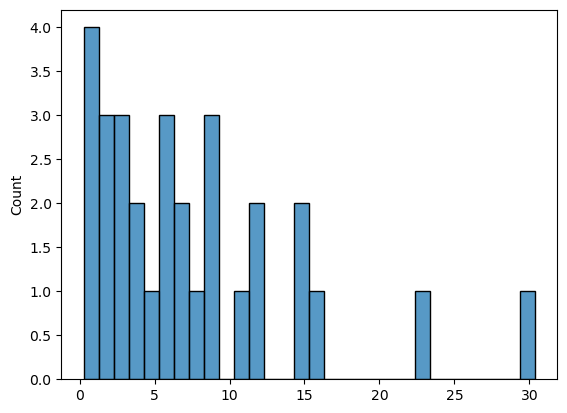

In [98]:
sns.histplot(x=x, bins=30)
plt.show()

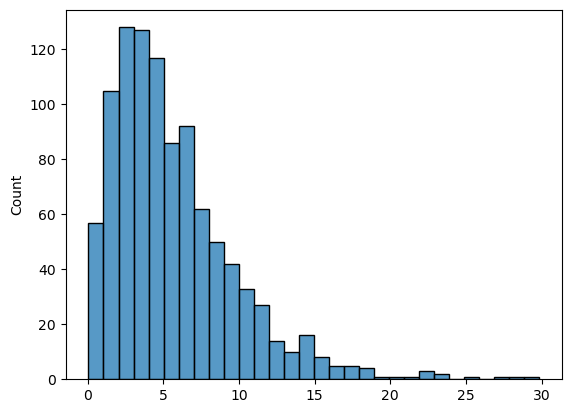

In [99]:
x = np.random.gamma(shape=2, scale=3, size=1000) # shape 알파, scale 베타
sns.histplot(x=x, bins=30)
plt.show()

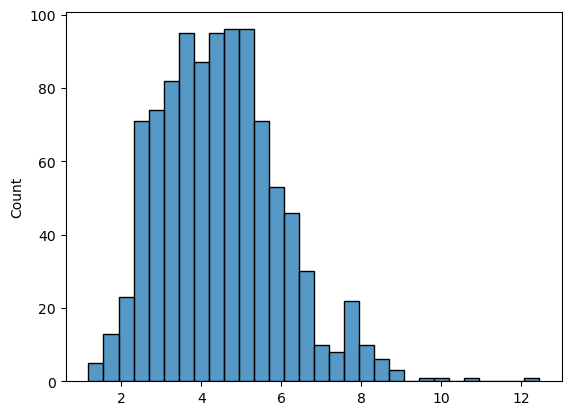

In [100]:
x = np.random.gamma(shape=9, scale=.5, size=1000) # shape 알파, scale 베타
sns.histplot(x=x, bins=30)
plt.show()

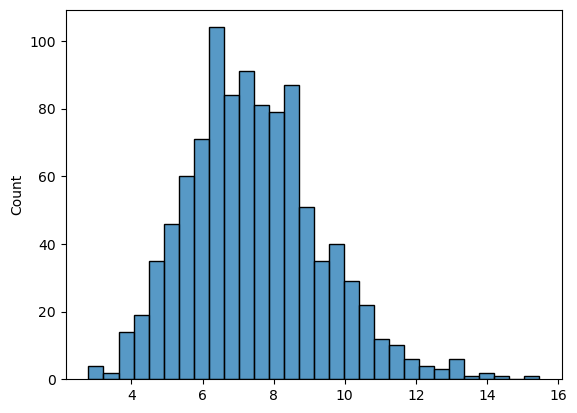

In [101]:
x = np.random.gamma(shape=15, scale=.5, size=1000) # shape 알파, scale 베타
sns.histplot(x=x, bins=30)
plt.show()

### 지수 분포 exponential distribution

In [102]:
x = np.random.exponential(scale=2, size=1000)
x

array([4.66220559e-01, 1.42435060e+00, 1.32895265e+00, 9.27872922e-01,
       8.88187981e+00, 1.70457238e+00, 2.82843030e-01, 7.32821178e-01,
       7.23839669e+00, 2.05242171e+00, 1.28287624e-01, 4.24801765e-01,
       1.33404009e+00, 2.43702190e+00, 6.48233344e-02, 3.96756674e-01,
       2.30885979e+00, 8.83376500e+00, 8.59206097e-02, 8.97179994e+00,
       1.23772245e+00, 3.06564957e+00, 1.28018434e+00, 1.64371410e-01,
       2.83583935e+00, 9.84126648e-03, 2.62804265e+00, 1.81087486e+00,
       3.78781671e+00, 3.07237578e+00, 1.11150290e+00, 1.05952488e+00,
       3.76654346e+00, 5.02420183e+00, 1.24318581e+00, 4.13903988e+00,
       2.37507779e+00, 2.26976887e+00, 3.82617078e-01, 2.88493776e+00,
       2.40445033e+00, 7.83131141e-01, 1.29370666e+00, 4.58248077e-01,
       7.65801210e-01, 2.02682667e-02, 6.20234578e-01, 1.62140401e+00,
       7.16694202e-01, 6.03753289e+00, 2.73174502e+00, 1.44725049e+00,
       6.82930613e+00, 2.24146903e+00, 5.69911610e+00, 5.99412119e+00,
      

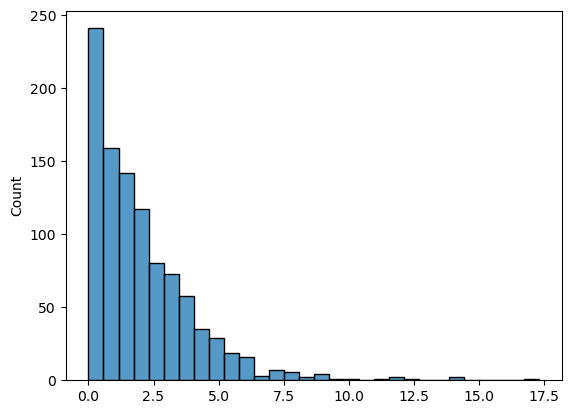

In [103]:
sns.histplot(x=x, bins=30)
plt.show()

### 카이제곱 분포 chi-square distribution

In [104]:
x = np.random.chisquare(df=3, size=1000) # df 자유도 degree of freedom
x

array([1.26628418e+00, 4.61054141e+00, 2.98811916e+00, 2.37869099e+00,
       1.24839787e+00, 8.01215759e-01, 4.15720705e-01, 2.94947241e+00,
       4.80552245e-01, 2.41856936e+00, 4.52157191e+00, 2.82500821e+00,
       5.22950836e+00, 4.29180237e+00, 7.88043754e+00, 2.88870126e+00,
       1.36138962e+01, 1.28752553e+00, 3.65082252e-01, 3.10272770e+00,
       1.13613095e+00, 1.28293481e+00, 3.78946779e-01, 3.55111729e+00,
       3.05685343e-01, 6.96584577e-01, 4.08577157e+00, 8.13790544e+00,
       8.06034620e+00, 1.80350985e+00, 3.82476754e+00, 3.32817488e+00,
       6.93796544e+00, 1.23939604e+00, 3.60111633e+00, 1.13367951e+00,
       1.28117567e+00, 6.42664471e+00, 5.62561201e-01, 2.06028769e+00,
       6.97176891e-01, 4.82229796e+00, 2.34977392e+00, 4.16400194e+00,
       2.65087087e+00, 3.79932703e-01, 1.61667001e+00, 5.53901942e+00,
       4.90965094e+00, 1.01066669e+01, 2.83611852e+00, 1.62210203e+00,
       2.06686586e+00, 3.13218265e+00, 2.93496964e+00, 4.25032152e+00,
      

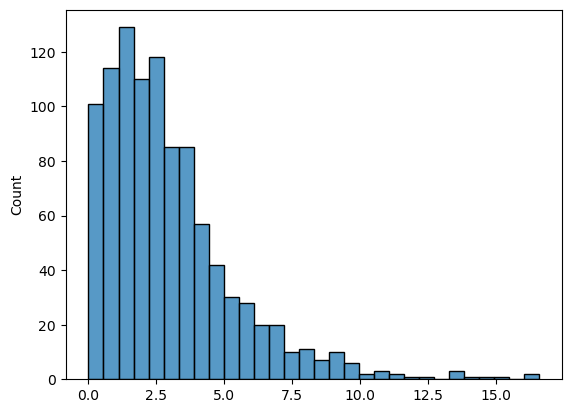

In [105]:
sns.histplot(x=x, bins=30)
plt.show()

### 베타 분포 beta distribution

In [106]:
x = np.random.beta(a=2, b=3, size=1000) # a가 알파, b가 베타
x

array([0.12963113, 0.22935378, 0.32232038, 0.08045872, 0.28017212,
       0.38201949, 0.17656691, 0.42661139, 0.6232734 , 0.13742383,
       0.67776847, 0.20030534, 0.43260592, 0.48484411, 0.28905962,
       0.45404528, 0.3728268 , 0.17916207, 0.31244101, 0.38992805,
       0.52916428, 0.47893518, 0.04857069, 0.37659315, 0.48248357,
       0.51306466, 0.21697629, 0.44723977, 0.47885834, 0.44402687,
       0.21092405, 0.2369923 , 0.41615665, 0.18232879, 0.21709431,
       0.23376815, 0.24465152, 0.3125164 , 0.37432366, 0.6242749 ,
       0.25428585, 0.48240419, 0.27399827, 0.46515544, 0.20521801,
       0.36397868, 0.62135568, 0.1797384 , 0.39790177, 0.11189644,
       0.56777896, 0.16449093, 0.46509354, 0.64723969, 0.13962435,
       0.31088511, 0.56665027, 0.37000663, 0.31209755, 0.44497202,
       0.45157614, 0.55589208, 0.36274704, 0.42028962, 0.0697033 ,
       0.13418296, 0.59216632, 0.71038499, 0.32971794, 0.54581224,
       0.57984738, 0.17607666, 0.4245951 , 0.23839573, 0.02788

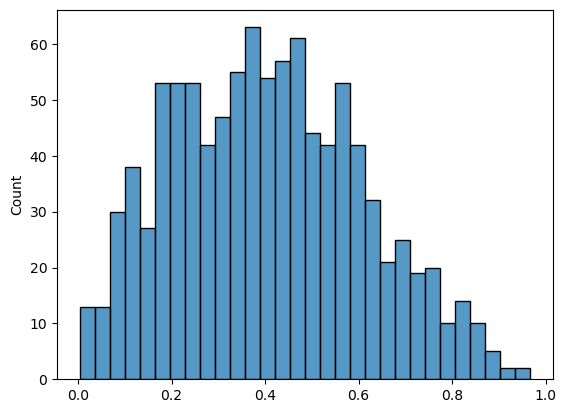

In [107]:
sns.histplot(x=x, bins=30)
plt.show()